### Essential Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set()

In [3]:
birth_Death_Rate_Data = pd.read_csv('crude-birth-death-natural-increase-rates-by-ethnic-group-from-1971-onwards.csv')
graduate_Salary_Data = pd.read_csv('graduate-employment-survey-ntu-nus-sit-smu-suss-sutd.csv', encoding = 'latin-1')

,year,ethnic_group,crude_death_rate,crude_birth_rate,crude_natural_inc_rate
0,1971,Chinese,5.5,22.1,16.6
1,1971,Malays,4.6,22.9,18.3
2,1971,Indians,5.9,21.1,15.2
3,1971,Others,5.6,29.2,23.6
4,1972,Chinese,5.4,23.0,17.6


### Singapore Birth Rate over the years


{2013: 12.625, 2014: 12.825, 2015: 12.674999999999999, 2016: 12.125, 2017: 11.5, 2018: 11.5, 2019: 11.0, 2020: 10.9, 2021: 10.8}


<AxesSubplot: xlabel='year', ylabel='Average Crude Birth Rate'>

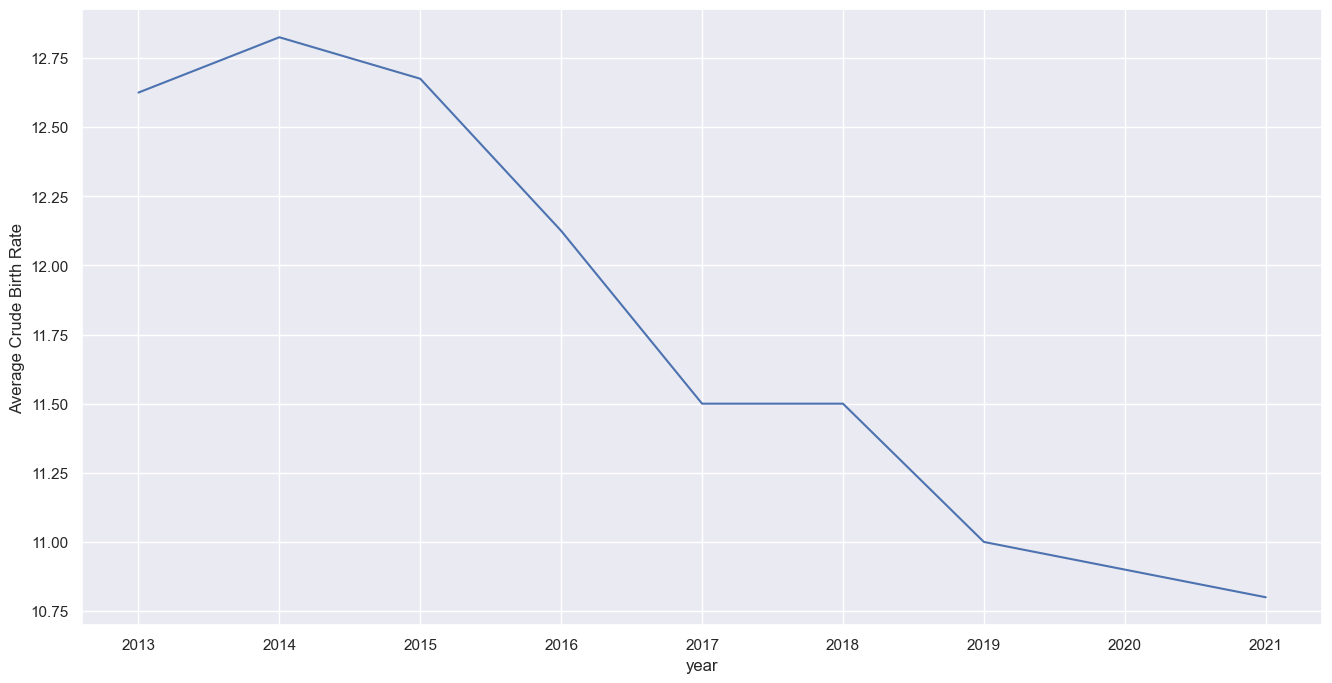

In [220]:
birth_Rate = pd.DataFrame(birth_Death_Rate_Data[['crude_birth_rate','year']])
birth_Rate_Above2012 = birth_Rate[birth_Rate['year'] >= 2013]
'''f = plt.figure(figsize=(16, 8))
sb.lineplot(data = birth_Rate_Above2012, x = 'year', y = 'crude_birth_rate')'''

averge_BirthRate_perYear = {}
for x in birth_Rate_Above2012['year']:
    birth_Rate_mean = birth_Rate_Above2012.query('year == ' + str(x))['crude_birth_rate'].astype(float).mean()
    averge_BirthRate_perYear[x] = birth_Rate_mean

print(averge_BirthRate_perYear)

df_averge_BirthRate_perYear = pd.DataFrame(averge_BirthRate_perYear.items(), columns=['year', 'Average Crude Birth Rate'])

f = plt.figure(figsize=(16, 8))
sb.lineplot(data = df_averge_BirthRate_perYear, x = 'year', y = 'Average Crude Birth Rate')

### Fresh Graduate Income Salary Over the Years

{2013: 3254.883116883117, 2014: 3250.233009708738, 2015: 3358.0091743119265, 2016: 3431.119266055046, 2017: 3508.278260869565, 2018: 3567.198347107438, 2019: 3744.52, 2020: 3803.517985611511, 2021: 3934.6716417910447}


<AxesSubplot: xlabel='year', ylabel='Basic Mean Salary'>

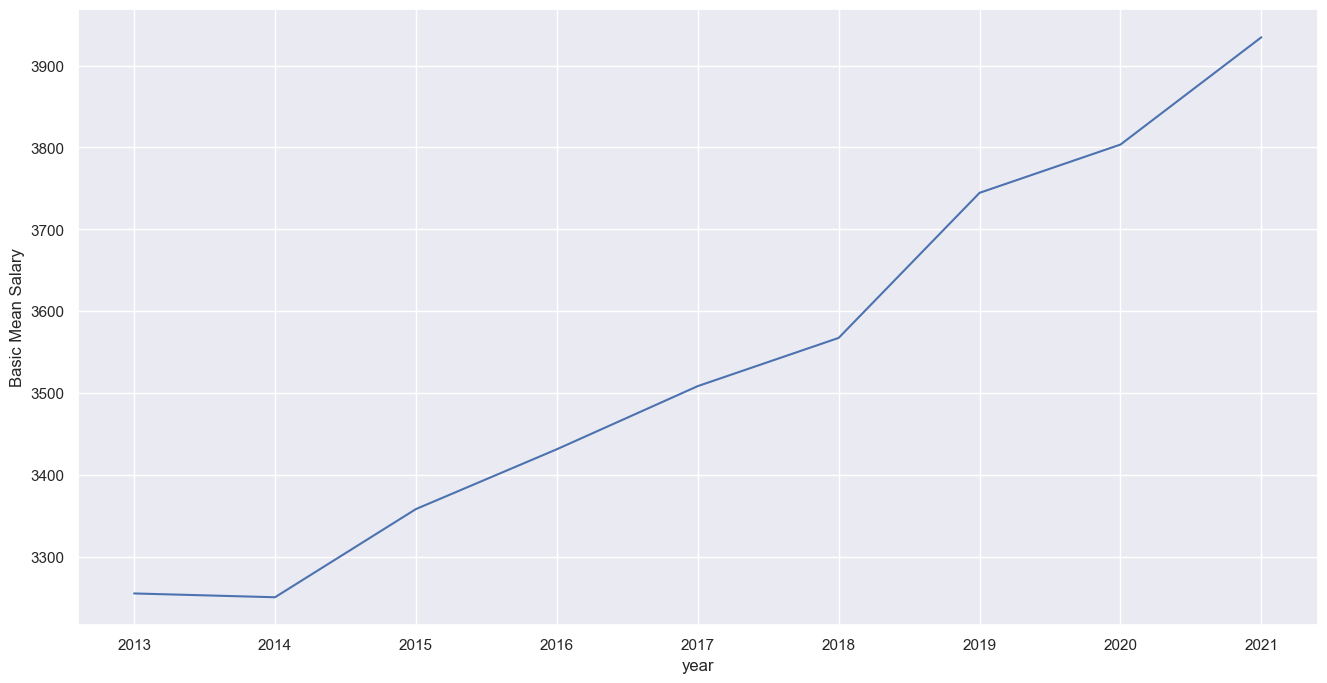

In [221]:
salary_Rate = pd.DataFrame(graduate_Salary_Data[['year','basic_monthly_mean']])
salary_Rate = salary_Rate[salary_Rate["basic_monthly_mean"].str.contains("na")==False]

averge_SalaryperYear = {}
for x in salary_Rate['year']:
    salary_Rate_mean = salary_Rate.query('year == ' + str(x))['basic_monthly_mean'].astype(int).mean()
    averge_SalaryperYear[x] = salary_Rate_mean

print(averge_SalaryperYear)

df_averge_SalaryperYear = pd.DataFrame(averge_SalaryperYear.items(), columns=['year', 'Basic Mean Salary'])

f = plt.figure(figsize=(16, 8))
sb.lineplot(data = df_averge_SalaryperYear, x = 'year', y = 'Basic Mean Salary')

### Displaying both Birth Rates and Income Salary from 2013 to 2021

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2013'),
  Text(1, 0, '2014'),
  Text(2, 0, '2015'),
  Text(3, 0, '2016'),
  Text(4, 0, '2017'),
  Text(5, 0, '2018'),
  Text(6, 0, '2019'),
  Text(7, 0, '2020'),
  Text(8, 0, '2021')])

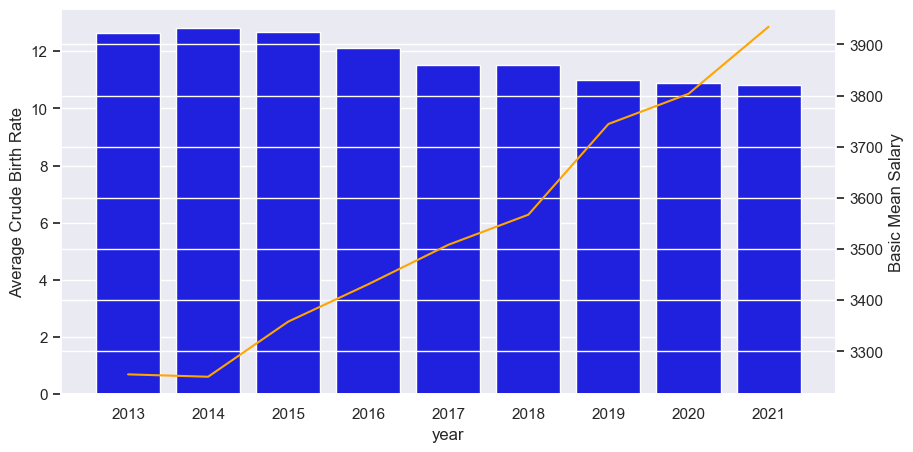

In [236]:
fig=plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

# changes here
sb.barplot(x = 'year', y = 'Average Crude Birth Rate',data=jointDF,color='blue',ax=ax1)
sb.lineplot(x = jointDF.index, y = 'Basic Mean Salary' ,data=jointDF,color='orange',ax=ax2)

# and here
plt.xticks(rotation=60)

### Correlation Betweem Graduate Income Salary Vs Birth Rate

<AxesSubplot: >

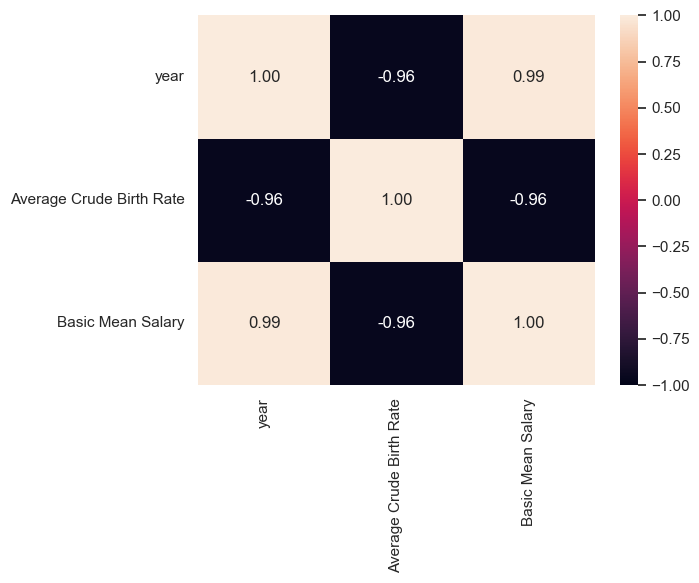

In [235]:
jointDF = pd.merge(df_averge_BirthRate_perYear,df_averge_SalaryperYear, on = 'year')

#pd.concat([df_averge_BirthRate_perYear, df_averge_SalaryperYear], axis = 1).reindex(df_averge_BirthRate_perYear.index)
jointDF.corr()
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")